example with 1 feature 

In [450]:
import numpy as np
from sklearn.datasets import make_classification
# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=20, n_features=1,  n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=123)

num_samples, num_features = X.shape
print('Dataset has ', num_samples ,' samples' )
print('Dataset has ', num_features ,' features')

Dataset has  20  samples
Dataset has  1  features


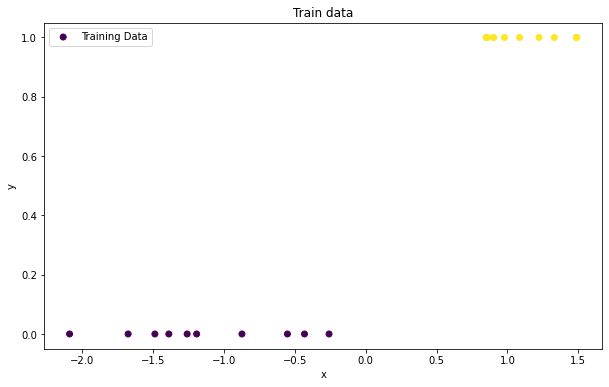

In [451]:
# Plot the example data
plt.figure(figsize=(10, 6))
plt.scatter(X,y, c=y, cmap='viridis', label='Training Data')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Train data')

plt.legend()
plt.show()

In [452]:
# These parameters control the learning rate of the gradient descent algorithm and the number of iterations to perform during training.
learning_rate = 0.01
num_iterations = 1000

# the input features X and target labels y as input. It initializes the weights and bias to zeros.
weights = np.zeros(num_features)
bias = 0

print('Initial weights is', weights)
print('I nitial bias is ', bias)

Initial weights is [0.]
I nitial bias is  0


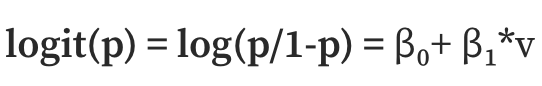

In [453]:
linear_model = np.dot(X, weights) + bias
print(linear_model)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The output Y is in log odds.
Odds = P(Event) / [1-P(Event)]

2. Computes predicted probabilities
The predicted probabilities are obtained by applying the sigmoid function to the linear model. These probabilities represent the model's confidence in predicting the positive class.

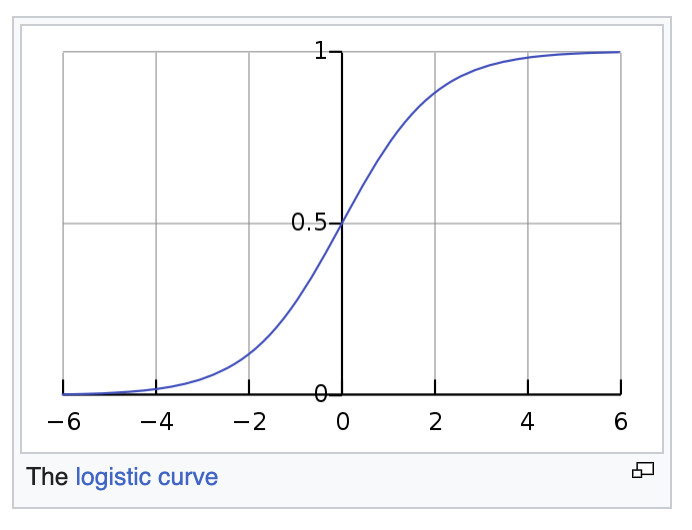

In [454]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_pred = sigmoid(linear_model)
print(y_pred)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]


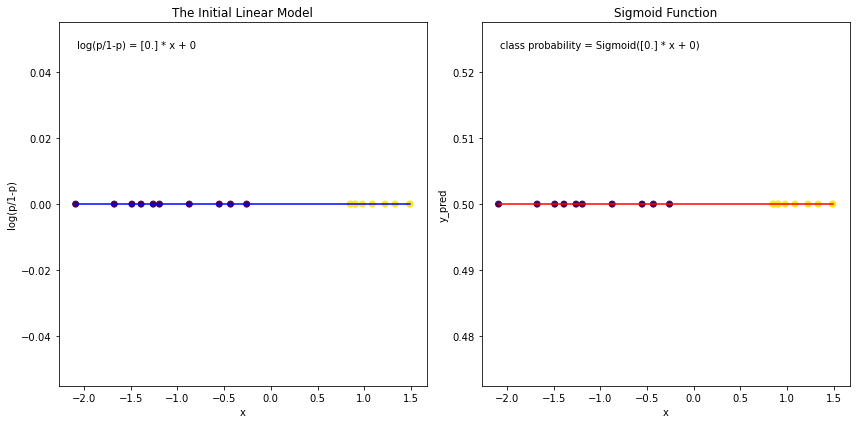

In [455]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1 - Line plot of x and y_linear
x_linear = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 20)
y_linear = np.zeros_like(x_linear) 

axs[0].plot(x_linear, y_linear, color='blue', label='Linear Model')
axs[0].scatter(X[:, 0], linear_model,c=y, cmap='viridis', label='Original Points')  # Highlight original poin
axs[0].set_xlabel('x')
axs[0].set_ylabel('log(p/1-p)')
axs[0].set_title('The Initial Linear Model')
axs[0].text(0.05, 0.95, f'log(p/1-p) = {weights} * x + {bias}',
             transform=axs[0].transAxes, fontsize=10, verticalalignment='top')

# Plot 3 - Sigmoid plot

# x_sigmoid = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(y_linear)

axs[1].plot(x_linear, y_sigmoid, color='red', label='Sigmoid')
axs[1].scatter(X[:, 0], y_pred,c=y, cmap='viridis', label='Original Points')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y_pred')
axs[1].set_title('Sigmoid Function')
axs[1].text(0.05, 0.95, f'class probability = Sigmoid({weights} * x + {bias})',
             transform=axs[1].transAxes, fontsize=10, verticalalignment='top')


plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


3. Update weights and bias using gradient descent
The gradients of the weights and bias are computed using the derivative of the logistic loss function. These gradients indicate the direction and magnitude of the updates to the parameters.

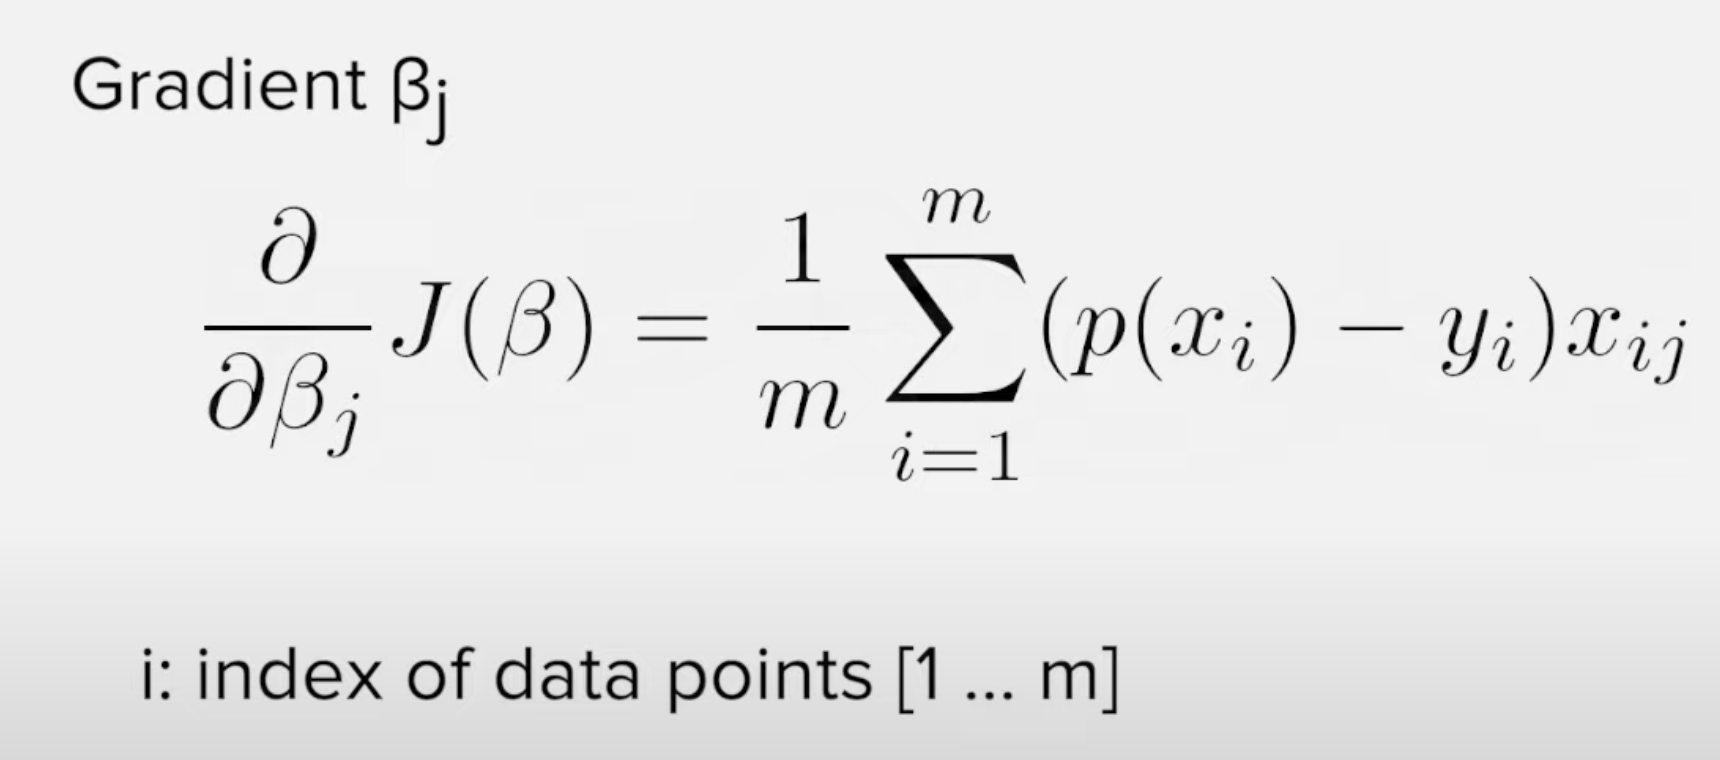

In [456]:
# define a function to plot the logist function and project the data points on the logit line
def plot_logist_projection(X,y,weights,bias):
    
    
    y_pred = sigmoid(np.dot(X, weights) + bias)
    
    plt.figure(figsize=(10, 6))
   
    plt.scatter(X,y, c=y, cmap='viridis', label='Original Data')
    plt.scatter(X, y_pred, color='red', label='Predicted y')

    for i in range(len(X)):
        plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='green', linestyle=':', linewidth=1)

    for i, y_p in enumerate(y_pred):
        plt.annotate(f"{y_p:.2f}", (X[i], y_pred[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    #plot sigmoid
    x_linear = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 20)
    if weights != 0:
        y_sigmoid = sigmoid((weights * x_linear + bias) )
    else:
        y_sigmoid =sigmoid(-np.zeros_like(x_linear))

    plt.plot(x_linear, y_sigmoid, color='orange', label='logist function(Sigmoid)')


    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('logist Function and Residuals')
    plt.legend()

    plt.show()


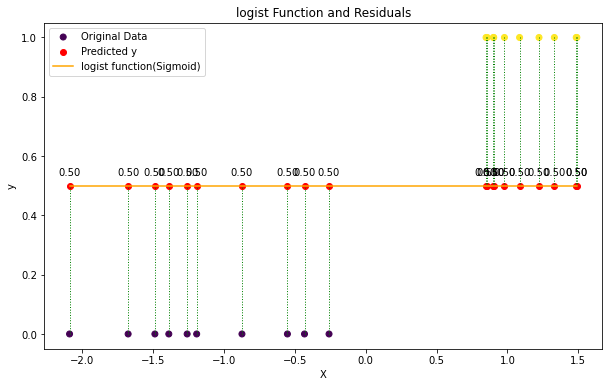

In [457]:
#plot the initial logist function
plot_logist_projection(X,y,weights,bias)

In [458]:
dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
db = (1 / num_samples) * np.sum(y_pred - y)

# The weights and bias are updated by subtracting the learning rate multiplied by the gradients. 
weights -= learning_rate * dw
bias -= learning_rate * db

print(dw,db)
print('The updated weights is ', weights)
print('The updated bias is ', bias)

[-0.55791153] 0.0
The updated weights is  [0.00557912]
The updated bias is  0.0


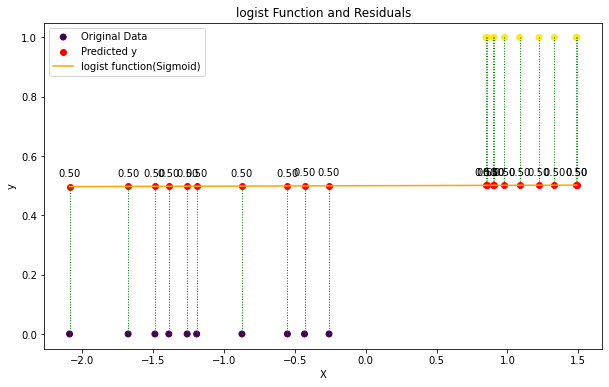

In [459]:
# plot the Logistic Function after 1st iteration
plot_logist_projection(X,y,weights,bias)

In [466]:
#iterate the update process
for _ in range(1,num_iterations):
    linear_model = np.dot(X,weights) + bias
    y_pred = sigmoid(linear_model)

    # Update weights and bias using gradient descent
    dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
    db = (1 / num_samples) * np.sum(y_pred - y)

    
    weights -= learning_rate * dw
    bias -= learning_rate * db

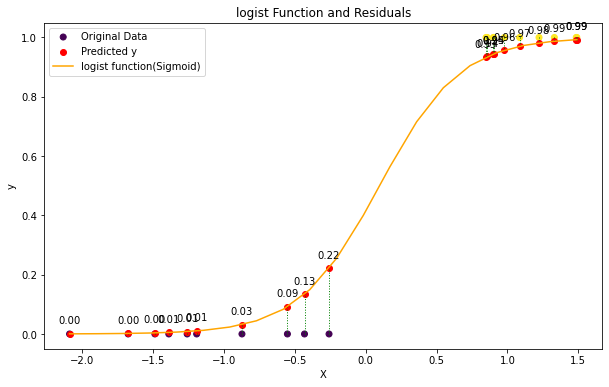

In [467]:
# plot the Logistic Function after 100th iteration
plot_logist_projection(X,y,weights,bias)

In [468]:
linear_model = np.dot(X, weights) + bias
y_pred = sigmoid(linear_model)
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]
np.array(y_pred_class)

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

Implementation based on the tutorial at https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
Sigmoid function reference: Wikipedia - Sigmoid function

The class function

In [469]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Update weights and bias using gradient descent
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]
        return np.array(y_pred_class)

